###Download Dataset dari Kaggle

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download himanshunakrani/naive-bayes-classification-data
! unzip naive-bayes-classification-data.zip -d bitcoin

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/2.02k [00:00<?, ?B/s]
100% 2.02k/2.02k [00:00<00:00, 1.56MB/s]
Archive:  naive-bayes-classification-data.zip
  inflating: bitcoin/Naive-Bayes-Classification-Data.csv  


In [ ]:
#import library
from math import sqrt
import pandas as pd
import numpy as np
from matplotlib import pyplot
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
%matplotlib inline

In [ ]:
#import Dataset
df = pd.read_csv("/content/bitcoin/Naive-Bayes-Classification-Data.csv")
df

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
...,...,...,...
990,45,87,0
991,40,83,0
992,40,83,0
993,40,60,1


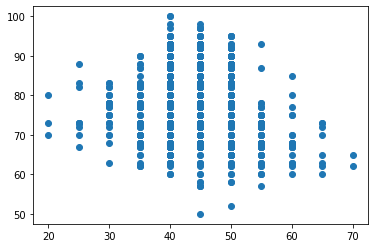

In [ ]:
pyplot.scatter(df.glucose,df.bloodpressure)

In [ ]:
#melihat dimensi dataset
df.shape

(1380, 7)

In [ ]:
#melihat informasi yang ada pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1380 entries, 2014-01-07 to 2017-10-17
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               1380 non-null   float64
 1   High               1380 non-null   float64
 2   Low                1380 non-null   float64
 3   Close              1380 non-null   float64
 4   Volume (BTC)       1380 non-null   float64
 5   Volume (Currency)  1380 non-null   float64
 6   Weighted Price     1380 non-null   float64
dtypes: float64(7)
memory usage: 86.2+ KB


In [ ]:
#mengecek data null pada dataset
df.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume (BTC)         0
Volume (Currency)    0
Weighted Price       0
dtype: int64

##Visualisasi

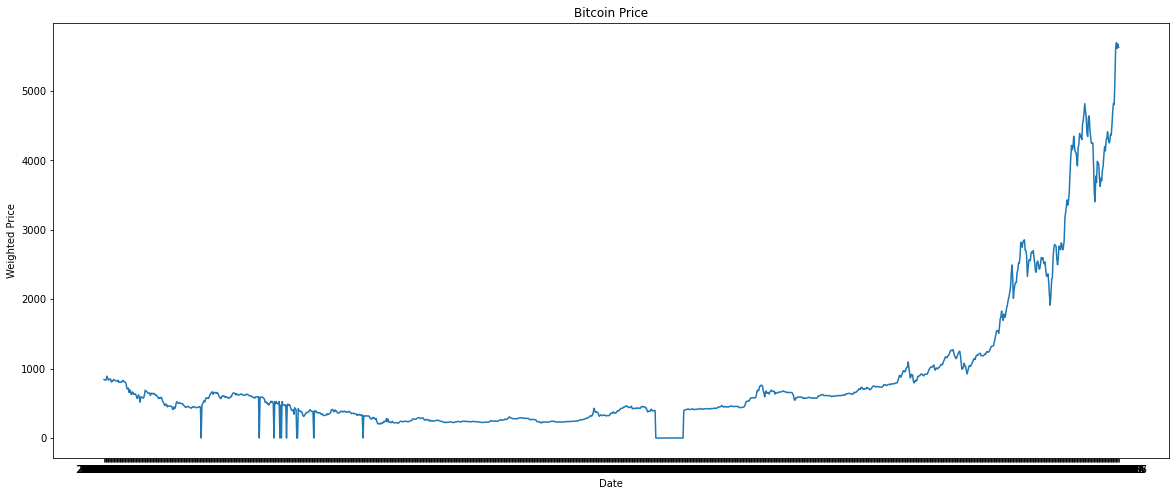

In [ ]:
pyplot.figure(figsize=(20,8))
pyplot.plot(df['Weighted Price'])
pyplot.title('Bitcoin Price')
pyplot.xlabel('Date')
pyplot.ylabel('Weighted Price')
pyplot.show()

In [ ]:
#normalisasi data wighted price menggunakan MinMaxScaler dengan range 0 sampai 1
values = df['Weighted Price'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scaled

array([[0.14787643],
       [0.14740579],
       [0.14607371],
       ...,
       [0.9855866 ],
       [0.9967225 ],
       [0.9883252 ]], dtype=float32)

In [ ]:
#membagi dataset untuk validation set 20%
train_size = int(len(scaled) * 0.8)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

1104 276


In [ ]:
#fungsi membuat dataset dengan look back
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [ ]:
#membuat dataset menjadi trainX, trainY, testX, testY
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

1103
275


In [ ]:
#reshape X untuk model training
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# model LSTM
model = Sequential()
model.add(LSTM(64))
model.add(Dense(1))

from keras.optimizers import SGD
opt = SGD(lr=0.1, momentum=0.7)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=opt,
              metrics=["mae"])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [ ]:
#model training
history = model.fit(trainX, trainY, epochs=100, batch_size=100, 
                    validation_data=(testX, testY), verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 52ms/step - loss: 0.0014 - mae: 0.0421 - val_loss: 0.0769 - val_mae: 0.3220
Epoch 2/100
12/12 [==============================] - 0s 7ms/step - loss: 6.3440e-04 - mae: 0.0294 - val_loss: 0.0803 - val_mae: 0.3325
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 6.2149e-04 - mae: 0.0289 - val_loss: 0.0798 - val_mae: 0.3312
Epoch 4/100
12/12 [==============================] - 0s 6ms/step - loss: 6.2161e-04 - mae: 0.0290 - val_loss: 0.0797 - val_mae: 0.3309
Epoch 5/100
12/12 [==============================] - 0s 7ms/step - loss: 6.1953e-04 - mae: 0.0289 - val_loss: 0.0802 - val_mae: 0.3327
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 6.2192e-04 - mae: 0.0288 - val_loss: 0.0789 - val_mae: 0.3288
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 6.1907e-04 - mae: 0.0289 - val_loss: 0.0797 - val_mae: 0.3313
Epoch 8/100
12/12 [==============================] - 0s 6m